# PISA - main factors affecting Student's Score
## by Walaa Elnozahy

## Investigation Overview

> in this investigation, I wanna check what is the main variable affecting student score in PISA survey, to be able to track the corresponding paramters. I'm most interested in figuring out who are the top student's countries, does being from a specific country affect your score. what is the common feature for these students is is the number of hours they study.does perfrormance is based on gender, location, or family background?
  

## Dataset Overview

> PISA stands for "The Program for International Student Assessment" which is an international assessment that measures students who are 15-year-old. it aims to assess their skills such as reading, mathematics, and science literacy every 3 years. This data is gathered from gathered done for students who are about to end their education. they are assessing their level and skills  along with details about them to check how well prepared they are for life beyond school.


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df_copy=pd.read_csv('Finaldata.csv')
newdf = df_copy[df_copy.total_outStudy_time != 0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Does Studying time Affects Student's Score? 
Study Time vs PISA Score 

> the first paramter I thought of using is the time for user studying vshis score, to detect if there is any correlation between the 2 paramters as it seemed logical that score would increase by increasing the number of hours student spend studying.

>However the results weren't expected as per the heat map show down below neither the out study time nor the subjects study were effective enought to show any indicate for hight effect on the score. 

>only a slight effect was shown for the out study time [Doing Homeowrk] 


In [10]:
scoresvslearntime = ['total_avg_score','average_math', 'average_science','average_read',
'Learningtime_testlanguage', 'Learningtime_Mathematics','Learningtime_Science'      
]
scorevsoutstudy = ['total_outStudy_time','Out_StudyTime_Homework',
                     'Out_StudyTime_GuidedHomework',
                     'Out_StudyTime_PersonalTutor',
                     'Out_StudyTime_CommercialCompany',
                     'Out_StudyTime_WithParent',
                     'Out_StudyTime_Computer',
                     'Out_StudyTime',
                   'total_avg_score','average_math', 'average_science','average_read'    
]

Summary: 
This chart shows the correlation between the learning time per each subject vs the score of each subject. Based on this correlation it shows that the learning time actually has low correlation with the students results. which is unexpected


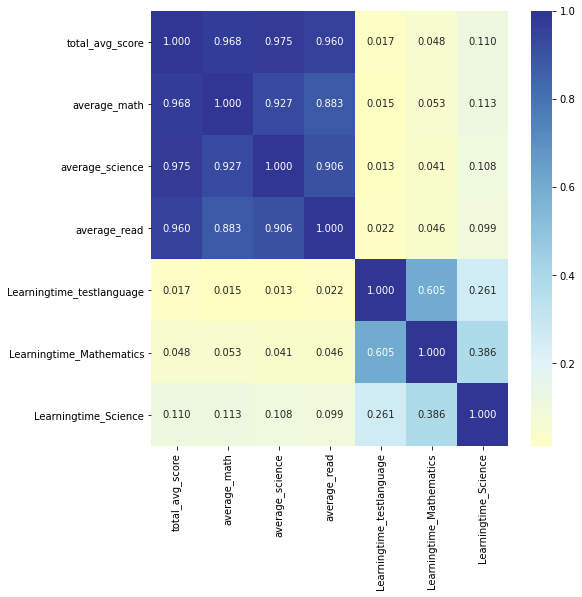

In [46]:
print ("\033[1m"+ 'Summary: \n'+ "\033[0m" + "This chart shows the correlation between the learning time per each subject vs the score of each subject. Based on this correlation it shows that the learning time actually has low correlation with the students results. which is unexpected")
# correlation plot
plt.figure(figsize = [8, 8])
sns.heatmap(df_copy[scoresvslearntime].corr(), annot = True, fmt = '.3f',
              cmap="RdYlBu",center = 0)
plt.show()



Summary: 
this chart shows the correlation between the extra studying time out of school vs the score of each subject.Based on this, Again there is almost no relation between the study time and the exam scores.however and as shown here these the only column with eefect is the [Out_StudyTime_Homework]


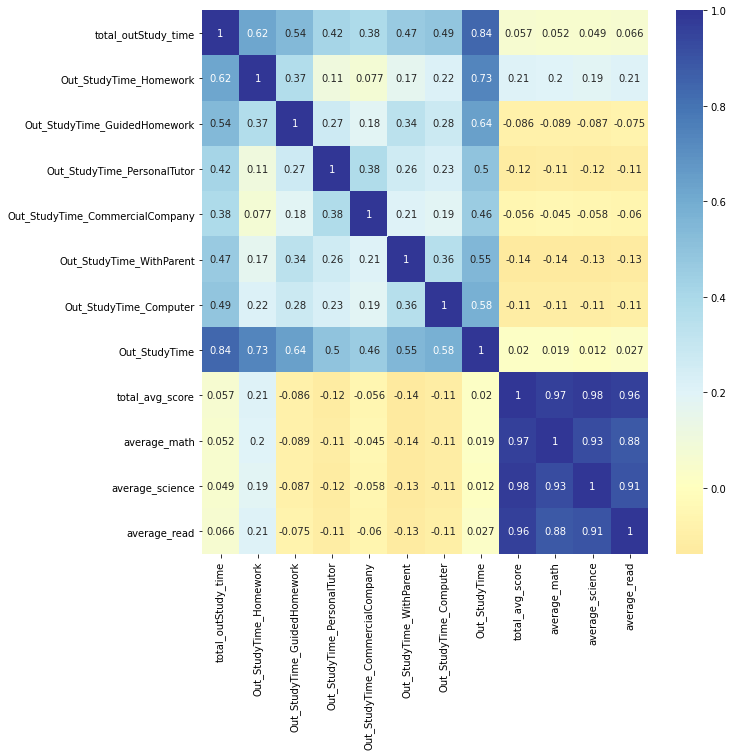

In [45]:
print ("\033[1m"+ 'Summary: \n'+ "\033[0m" +'this chart shows the correlation between the extra studying time out of school vs the score of each subject.Based on this, Again there is almost no relation between the study time and the exam scores.however and as shown here these the only column with eefect is the [Out_StudyTime_Homework]')# correlation plot for out study time vs results
plt.figure(figsize = [10, 10])
sns.heatmap(df_copy[scorevsoutstudy].corr(), annot = True,cmap="RdYlBu",center = 0)
plt.show()


### Summary: 
this chart shows the correlation between the extra studying time out of school vs the score of each subject.Based on this, Again there is almost no relation between the study time and the exam scores.however and as shown here these the only column with eefect is the [Out_StudyTime_Homework]

## Do we actually have no relation between study time and score? 

> it is intersting that time of study didn't affect the score. But it seems that one paramter had a small effect, so we need to confrim it by analysing this relation.. 

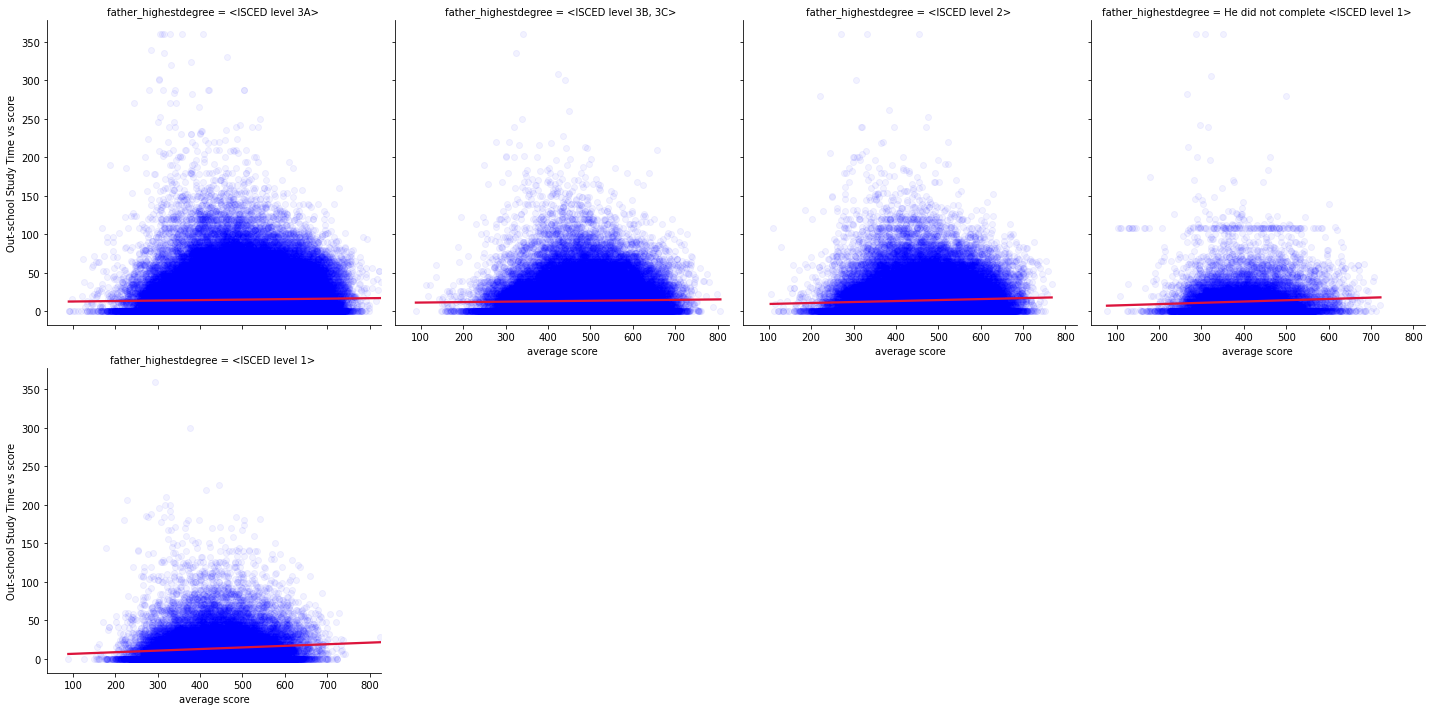

Summary: 
This charts shows the learning time vs score based per each education level for student'sfathers. it seems there is almost effect for the studying time. as there is even student who study for long time however they still gets low scores


In [29]:
# so first we start to double check the relation between total study time and score 
g = sns.FacetGrid(data = df_copy, col = 'father_highestdegree', col_wrap = 4, height = 5)
g.map(sns.regplot, 'total_avg_score', 'total_outStudy_time', color = 'blue', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'crimson'})
g.set_xlabels('average score')
g.set_ylabels('Out-school Study Time ')

plt.show()
print ("\033[1m"+ 'Summary: \n'+ "\033[0m" +
                 'This charts shows the learning time vs score based per each education level for student\'s fathers.'+
                 'it seems there is almost effect for the studying time.'+
                 ' as there is even student who study for long time however they still gets low scores')


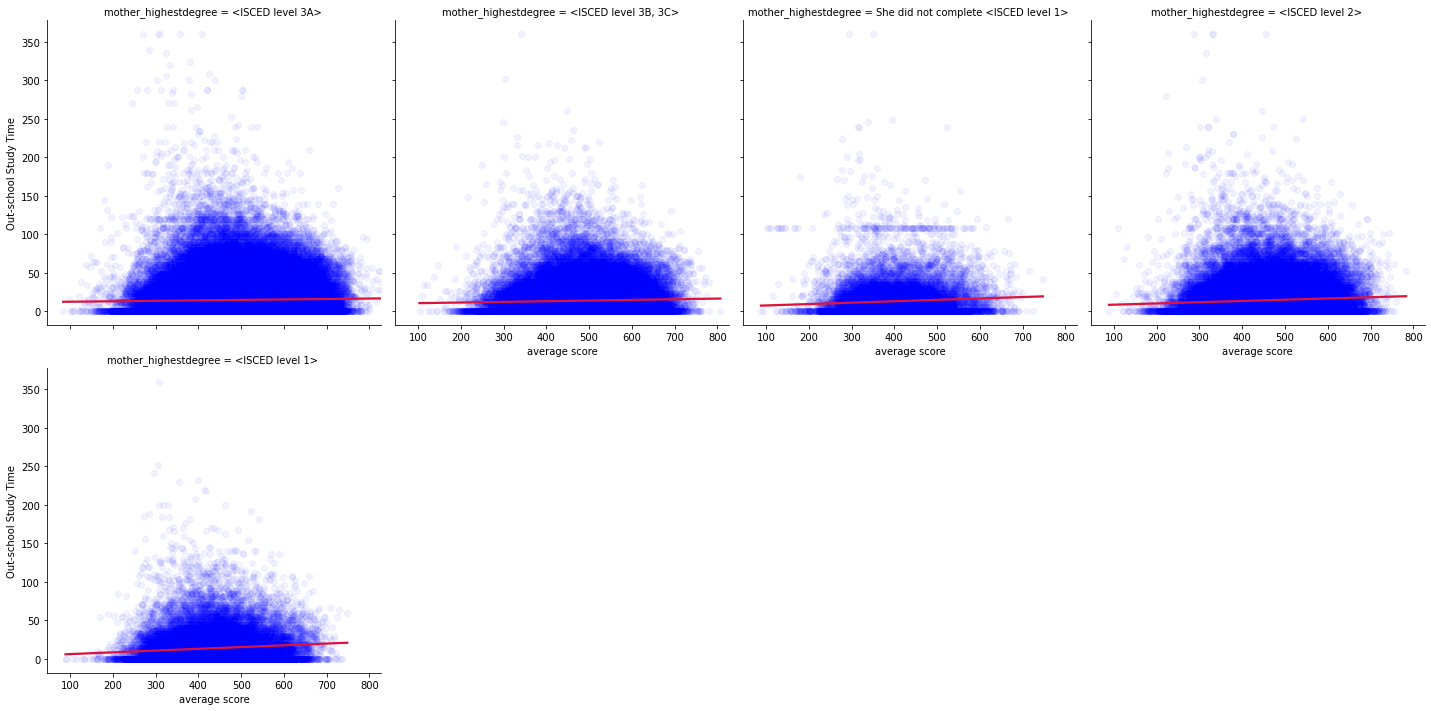

Summary: 
This charts shows the learning time vs score based per each education level for student's Mothers.it seems to have the exact same conclusion as fathers education level


In [30]:
# so first we start to double check the relation between total study time and score 
g = sns.FacetGrid(data = df_copy, col = 'mother_highestdegree', col_wrap = 4, height = 5)
g.map(sns.regplot, 'total_avg_score', 'total_outStudy_time', color = 'blue', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'crimson'})
g.set_xlabels('average score')
g.set_ylabels('Out-school Study Time')

plt.show()
print ("\033[1m"+ 'Summary: \n'+ "\033[0m" +
                 'This charts shows the learning time vs score based per each education level for student\'s Mothers.'+
                 'it seems to have the exact same conclusion as fathers education level')

I noticed that in the heat map only one parameter showed a slight effect on the score. So we need to dig deeper to check


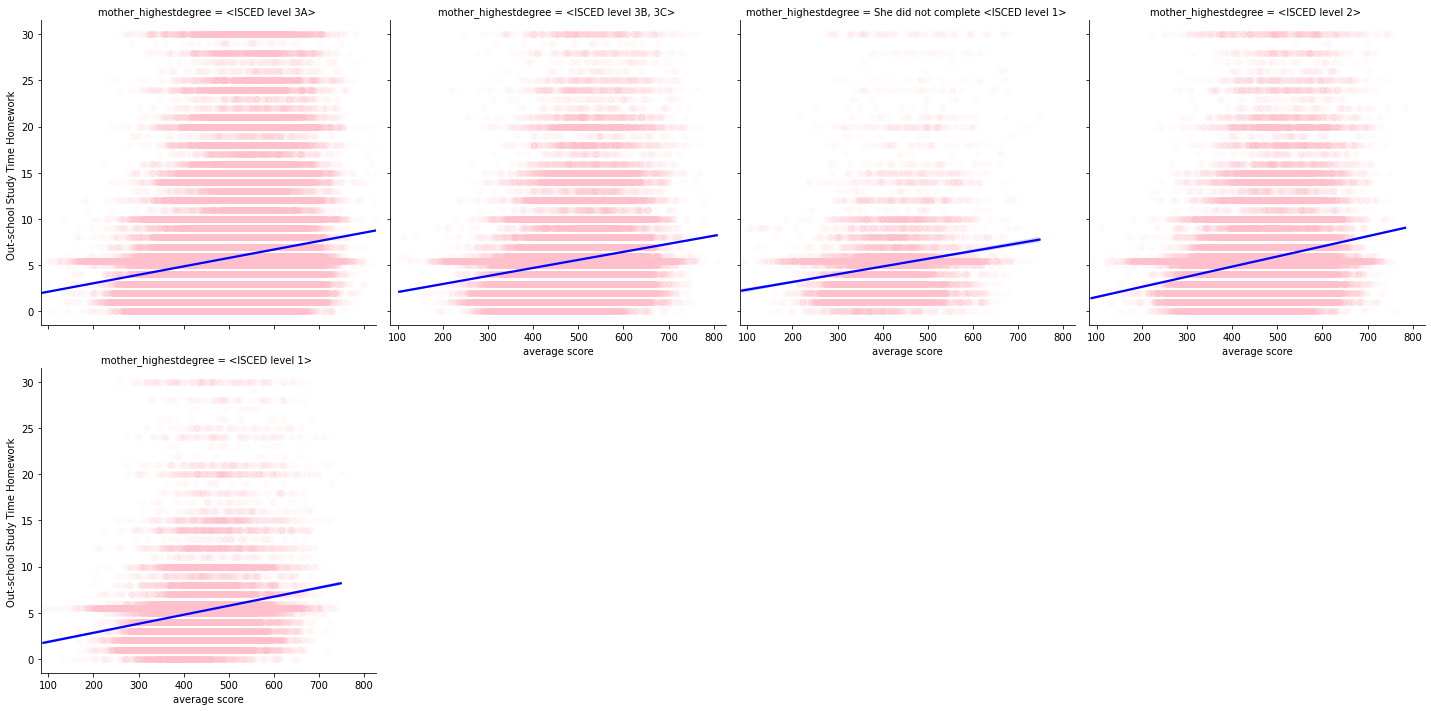

Summary: 
after comparing the homework effect only, the results seems positivehere showing a real coorelation. the homework study time affects student's score and has an encreasing relation when time increase the score increase accordingly


In [31]:
print ("\033[1m"+ 'I noticed that in the heat map only one parameter showed a slight effect on the score. So we need to dig deeper to check'+"\033[1m")

# Now let\s check the relation if we considered the homework out study only
g = sns.FacetGrid(data = df_copy, col = 'mother_highestdegree', col_wrap = 4, height = 5)
g.map(sns.regplot, 'total_avg_score', 'Out_StudyTime_Homework', color = 'pink', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'blue'})
g.set_xlabels('average score')
g.set_ylabels('Out-school Study Time Homework ')


plt.show()
print ("\033[1m"+ 'Summary: \n'+ "\033[0m" +
                 'After comparing the homework effect only, the results seems positivehere showing a real coorelation.'+
                 ' the homework study time affects student\'s score and has an encreasing relation when time increase the score increase accordingly')

### Summary: 
after comparing the homework effect only, the results seems positivehere showing a real coorelation. the homework study time affects student's score and has an encreasing relation when time increase the score increase accordingly

Summary: 
Smae effect occurs per each education level for tmothers as well, which means that both fathers and mothers education has effect on their kids based on this it seems that the Homework does have a clear increamental relation with score. as homework affect student's score and has an encreasing relation when time increase the score increase accordingly


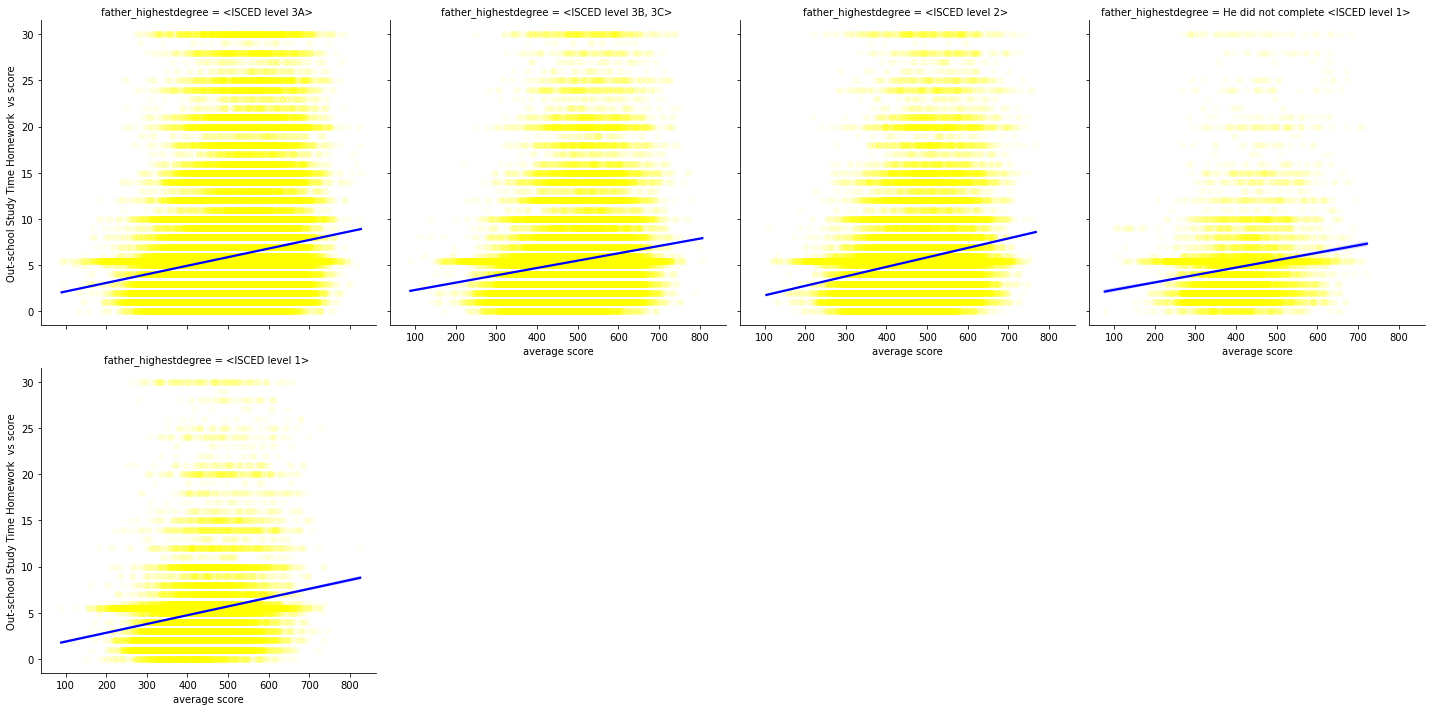

In [40]:

print ("\033[1m"+ 'Summary: \n'+ "\033[0m" +
                 'Smae effect occurs per each education level for tmothers as well, which means that both fathers and mothers education has effect on their kids '+
       "based on this it seems that the Homework does have a clear increamental relation with score. as homework affect student's score and has an encreasing relation when time increase the score increase accordingly")
# and based on the father's education
g = sns.FacetGrid(data = df_copy, col = 'father_highestdegree', col_wrap = 4, height = 5)
g.map(sns.regplot, 'total_avg_score', 'Out_StudyTime_Homework', color = 'yellow', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'blue'})
g.set_xlabels('average score')
g.set_ylabels('Out-school Study Time Homework  vs score')

plt.show()

based on this it seems that the Homework does have a clear increamental relation with score. as homework affect student's score and has an encreasing relation when time increase the score increase accordingly

## Does gender and parents education have effect on the score

> needed to check if geneder have an extra effect when comparing it with parent education and score. 
maybe gender has a factor and female details vs male would be different 

Summary: 
comparing students distribtuion to education level is very insightfull. It actually showed that the highest number of student who are actually learning and took the exam has educated parentswuth going down in level we found that total number of students is going lower


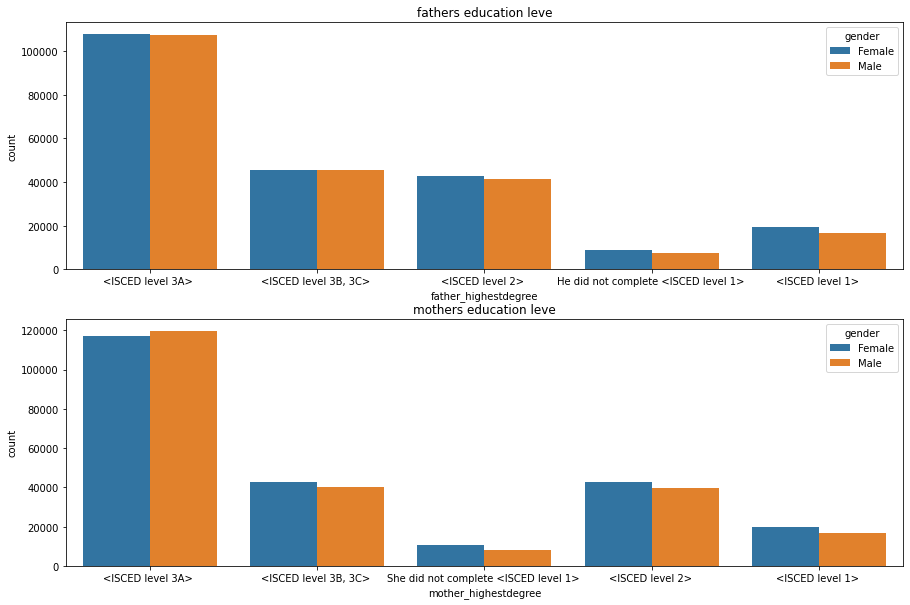

In [38]:
fig, ax=plt.subplots(nrows=2, figsize=(15,10))
plt.sca(ax[0])
sns.countplot(data = df_copy, x = 'father_highestdegree', hue = 'gender');
plt.title('fathers education leve')
plt.sca(ax[1])
sns.countplot(data = df_copy, x = 'mother_highestdegree', hue = 'gender');
plt.title('mothers education leve');

print ("\033[1m"+ 'Summary: \n'+ "\033[0m" + 
       'comparing students distribtuion to education level is very insightfull. It actually showed that the highest number of student who are actually learning and took the exam has educated parents'+ 
      'wuth going down in level we found that total number of students is going lower')

Summary: 
when we start to check score level for per each educational levelit shows that the higher the education level the higher the mean for the score gets


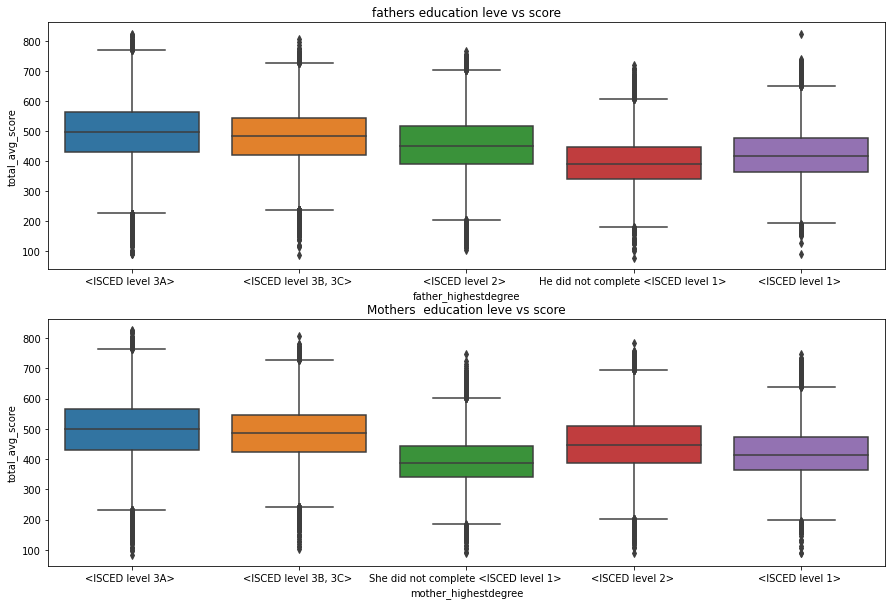

In [35]:
#check the boxplot for gender vs total score
fig, ax=plt.subplots(nrows=2, figsize=(15,10))
plt.sca(ax[0])
sns.boxplot(data = df_copy, 
              x = 'father_highestdegree', 
              y = 'total_avg_score');
plt.title('fathers education leve vs score')

plt.sca(ax[1])
sns.boxplot(data = df_copy, 
              x = 'mother_highestdegree', 
              y = 'total_avg_score');
plt.title('Mothers  education leve vs score');


print ("\033[1m"+ 'Summary: \n'+ "\033[0m" + 
       'when we start to check score level for per each educational level'+
      'it shows that the higher the education level the higher the mean for the score gets')

Summary: 
now when we add student gender to the equation to check score per gender per parents education level.it seems that female mean is slightly higher that the male. However male has the hightest score outliersSo to sum this up we can say that parent's education level has effect on student's score. for example the parents who didn't get education. has least mean for the score


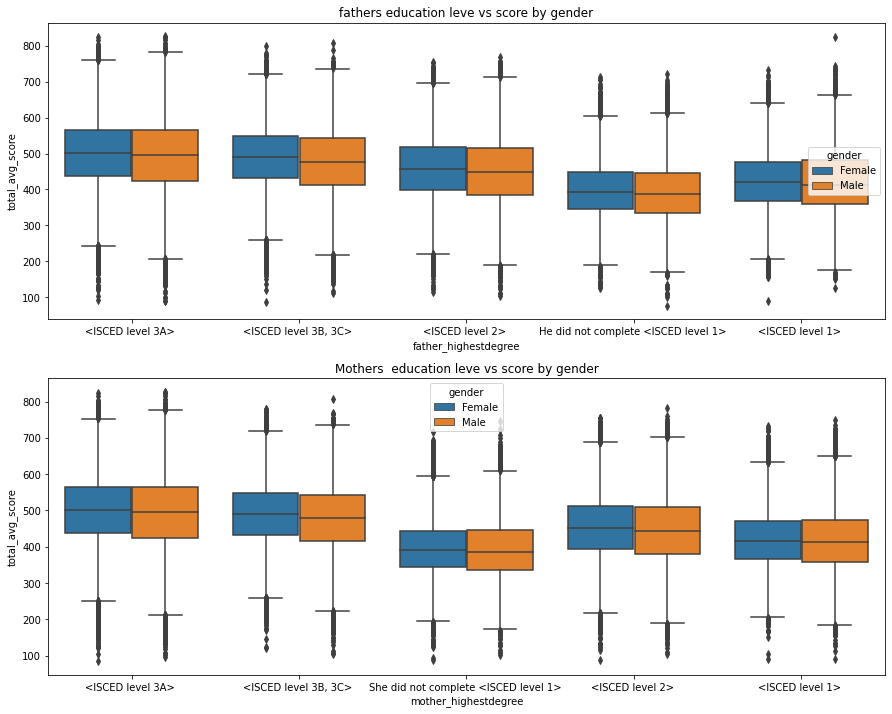

In [47]:
#check the boxplot for gender vs total score
fig, ax=plt.subplots(nrows=2, figsize=(15,12))
plt.sca(ax[0])
sns.boxplot(data = df_copy, 
              x = 'father_highestdegree', 
              y = 'total_avg_score',
              hue = 'gender');
plt.title('fathers education leve vs score by gender')

plt.sca(ax[1])
sns.boxplot(data = df_copy, 
              x = 'mother_highestdegree', 
              y = 'total_avg_score',
              hue = 'gender');
plt.title('Mothers  education leve vs score by gender');


print ("\033[1m"+ 'Summary: \n'+ "\033[0m" + 
       'now when we add student gender to the equation to check score per gender per parents education level.'+
      'it seems that female mean is slightly higher that the male. However male has the hightest score outliers'
      +'So to sum this up we can say that parent\'s education level has effect on student\'s score. for example the parents who didn\'t get education. has least mean for the score')

### Summary: 
now when we add student gender to the equation to check score per gender per parents education level.it seems that female mean is slightly higher that the male. However male has the hightest score outliersSo to sum this up we can say that parent's education level has effect on student's score. for example the parents who didn't get education. has least mean for the score

## Summary

> In the presentation, I started of with showing detials about the data and dataset, then started with my first doubt of investigating  which is the parents education and to check check if parents education does affect the score. then checked the effect of the parents educations compared with student's gender and their score.

> The result showed that the average of students score decrease with parents who have low education and gradually increase with the increase of learning level. also it seems that the mean for the males is always slightly higher than the male's mean 
 
> the seocnd key which is importatnt is studying hours effect on student score by checking all studying types then comparing the sum of these studying time and compare it with score. 
it seemed not useful then only found that one studying type has effect on student score. 


It seems that the average of students score decrease with parents who have low education and gradually increase with the increase of learning level. 
also it seems that the mean for the males is always slightly higher than the male's mean

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!